In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [2]:
tol = abs(1 - 3 * (4./3. - 1))

def hsl_to_rgb(h, s, l):
    c = (1 - abs(2 * l - 1))
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = l - 0.5 * c
    (r_, g_, b_) = (0., 0., 0.)
    if h < 60:
        (r_, g_, b_) = (c, x, 0)
    elif h < 120:
        (r_, g_, b_) = (x, c, 0)
    elif h < 180:
        (r_, g_, b_) = (0, c, x)
    elif h < 240:
        (r_, g_, b_) = (0, x, c)
    elif h < 300:
        (r_, g_, b_) = (x, 0, c)
    else:
        (r_, g_, b_) = (c, 0, x)
    r = math.floor(255 * (r_ + m))
    g = math.floor(255 * (g_ + m))
    b = math.floor(255 * (b_ + m))
    return (r, g, b)

def color_map(z, rank, gamma=6.0):
    phase = cmath.phase(z)
    if phase < 0:
        phase += 2 * math.pi
    h = (math.pi + cmath.phase(z)) / math.pi * 180.
    l = pow(1 - rank, gamma)
    return hsl_to_rgb(h, 1.0, l)

In [3]:
def newtons_method(f, df, z0, iterations=100, tolerance=tol):
    err = 1 + tolerance
    index = 0
    z_old = z0
    while index < iterations and err >= tolerance:
        d = df(z_old)
        if abs(d) < tolerance:
            return (z_old, 0)
        z_new = z_old - f(z_old) / d
        err = abs(z_new - z_old)
        z_old = z_new
        index += 1
    return (z_old, (1. * index)/(1. * iterations))

In [4]:
def newtons_fractal(f, df, lower_left=complex(-1, -1), upper_right=complex(1, 1), width=500, height=500,
                    iterations=100, tolerance=tol, color_map=color_map):
    real_delta = (upper_right.real - lower_left.real) / (1. * width)
    imag_delta = (upper_right.imag - lower_left.imag) / (1. * height)
    image_data = np.zeros((height, width, 3), dtype=np.uint8)
    upper_left = complex(lower_left.real, upper_right.imag)
    for i in range(width):
        for j in range(height):
            z0 = complex(lower_left.real + i * real_delta, upper_right.imag - j * imag_delta)
            (z, n) = newtons_method(f, df, z0, iterations=iterations, tolerance=tolerance)
            image_data[j, i, :] = color_map(z, n)
    return image_data

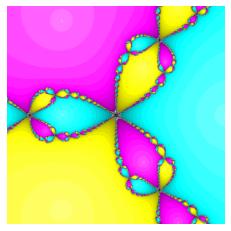

In [191]:
f = lambda z: pow(z, 3) - complex(1, 0)
df = lambda z: complex(3, 0) * pow(z, 2)
pixels = newtons_fractal(f, df)
plt.axis('off')
plt.imshow(pixels)
plt.show()

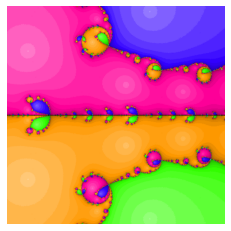

In [192]:
f0 = lambda z: pow(z, 4) + pow(z, 3) + pow(z, 2) + z + complex(1, 0)
df0 = lambda z: complex(4, 0) * pow(z, 3) + complex(3, 0) * pow(z, 2) + complex(2, 0) * z + complex(1, 0)
pixels0 = newtons_fractal(f0, df0)
plt.axis('off')
plt.imshow(pixels0)
plt.show()

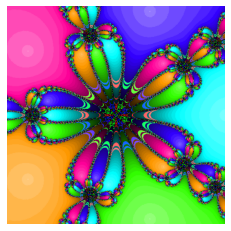

In [193]:
f1 = lambda z: pow(z, 5) - 1
df1 = lambda z: complex(5, 0) * pow(z, 4)
pixels1 = newtons_fractal(f1, df1)
plt.axis('off')
plt.imshow(pixels1)
plt.show()

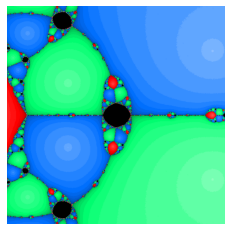

In [5]:
f2 = lambda z: pow(z, 3) - complex(2, 0) * z + complex(2, 0)
df2 = lambda z: complex(3, 0) * pow(z, 2) - complex(2, 0)
pixels2 = newtons_fractal(f2, df2)
plt.axis('off')
plt.imshow(pixels2)
plt.show()

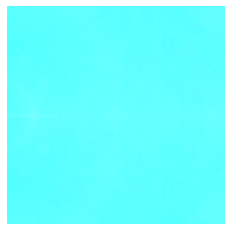

In [9]:
f3 = lambda z: cmath.sin(z) - 1
df3 = lambda z: cmath.cos(z)
pixels3 = newtons_fractal(f3, df3, color_map=lambda z, r: color_map(z, r, gamma=1.0))
plt.axis('off')
plt.imshow(pixels3)
plt.show()

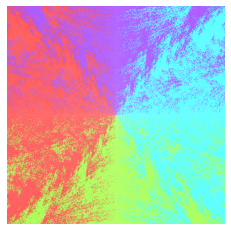

In [8]:
f4 = lambda z: cmath.cosh(z) - 1
df4 = lambda z: cmath.sinh(z)
pixels4 = newtons_fractal(f4, df4, color_map=lambda z, r: color_map(z, r, gamma=1.0))
plt.axis('off')
plt.imshow(pixels4)
plt.show()

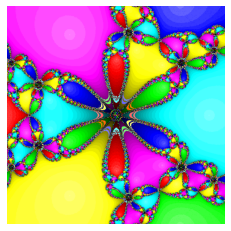

In [10]:
f5 = lambda z: pow(z, 6) + pow(z, 3) - complex(1, 0)
df5 = lambda z: complex(6, 0) * pow(z, 5) + complex(3, 0) * pow(z, 2)
pixels5 = newtons_fractal(f5, df5)
plt.axis('off')
plt.imshow(pixels5)
plt.show()